# **Financial Data Overview**

We will take a look at our Financial Data Set and give a few insights and points and draw a hypothesis given what we've looked at...

* Step: A unit of time that represents hours in the data. Think of this as the timestamp of the transaction (e.g hour 1, hour 2....hour 534, ...)

* Type: The type of transaction 

* Amount: The amount of money transferred 

* NameOrig: The origin account name 

* OldBalanceorg: The origin accounts balance before the transaction

* NewBalanceDest: The destination accounts balance after the transaction 

* IsFlaggedfraud: A "Naive" model that simply flags a transaction as fraudulent if it is greater than 200,000 (not that this currency is not USD)

* IsFraud: Was this simulated transaction actually fradulent? In this case, we condier "fraud" to be malicious transaction that aimed to transfer funds out of a victim's bank
account before the account owener could secure their information. 






In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.ticker import FuncFormatter


#Importing the data 
file_path = r"data/Fin_data.csv"

df = pd.read_csv(file_path)

#Displaying the first 5 rows of data 
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.shape

(6362620, 11)

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


---

#  **Univariate Analysis**

In [7]:
#Value Counts for Is Fraud 
value_counts_Fraud = df['isFraud'].value_counts().to_frame()

value_counts_Fraud


,count
isFraud,
0,6354407
1,8213


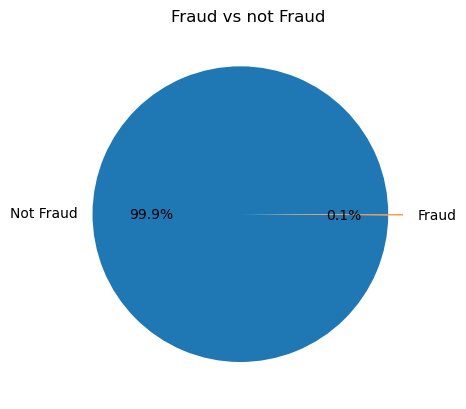

In [8]:
data0 = [ 6354407, 8213]
label = ['Not Fraud', 'Fraud']

explode = [0.05,0.05]
plt.title( "Fraud vs not Fraud")
plt.rcParams['figure.figsize'] = (10,10)
plt.pie(data0, labels=label, autopct= '%1.1f%%', explode= explode)
plt.show()

In [9]:
#Value Counts for isFlaggedFraud
value_counts_isFlaggedFraud = df['isFlaggedFraud'].value_counts().to_frame()

value_counts_isFlaggedFraud


,count
isFlaggedFraud,
0,6362604
1,16


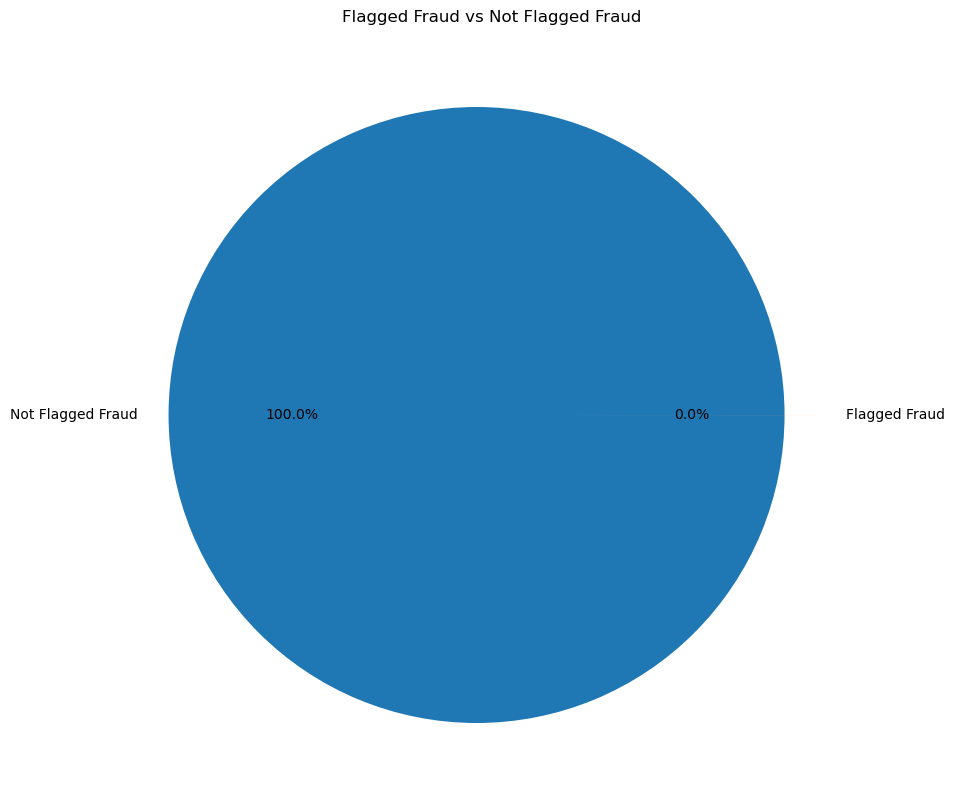

In [34]:
#Getting the values and lables for the pie chart
data0 = [ 636204, 16]
label = ['Not Flagged Fraud', 'Flagged Fraud']

explode = [0.05,0.05]
plt.title( "Flagged Fraud vs Not Flagged Fraud")
plt.rcParams['figure.figsize'] = (10,10)
plt.pie(data0, labels=label, autopct= '%1.1f%%', explode= explode)
plt.show()

#### These two dataframes indicate the number of accounts identified as fraudulent and those flagged as fraudulent within the dataset

* We see here that only 16 accounts were flagged fraud, and compared to the rest, this pie chart has that valued at 0% of the dataset 

# **Types of transactions** 

In [11]:
type_counts = df['type'].value_counts().to_frame()

type_counts

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


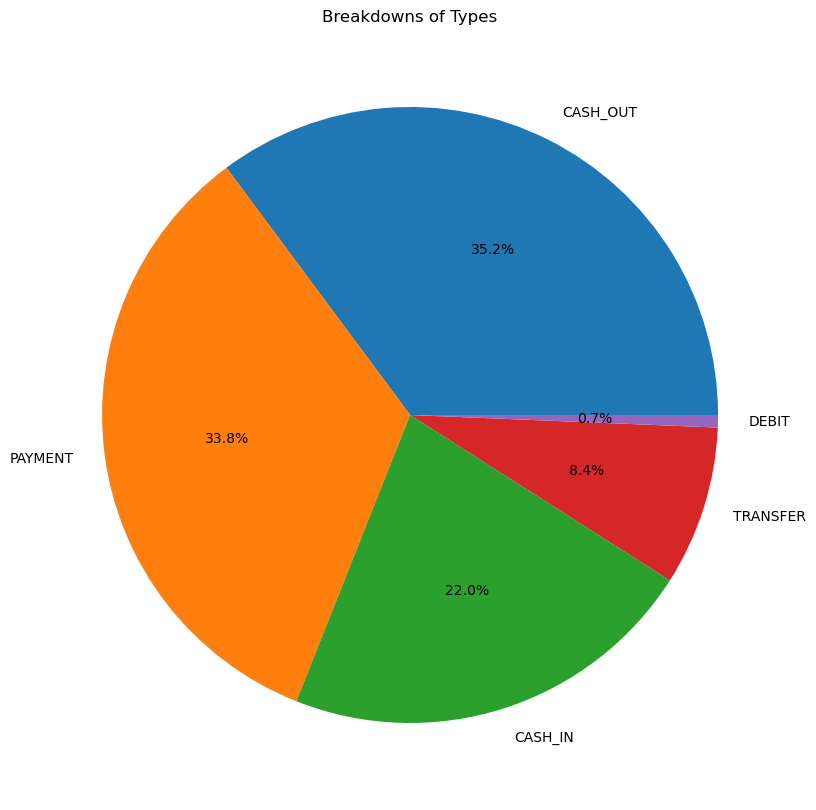

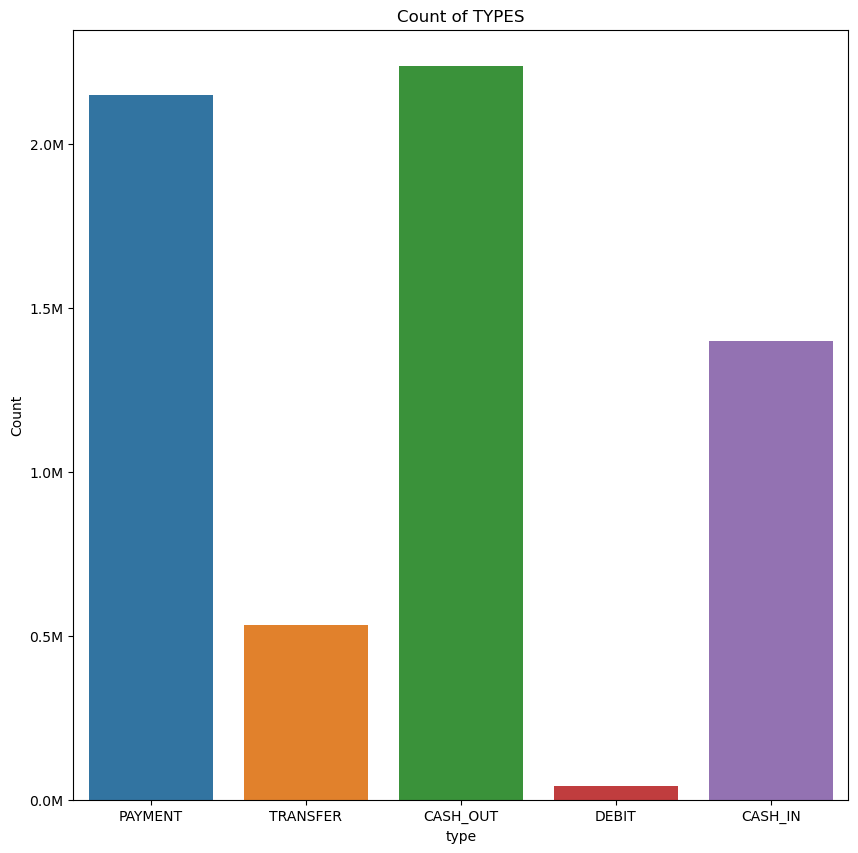

In [106]:
#Getting the values and lables for the pie chart
size = [2237500, 2151495, 1399284, 532909, 41432]
label = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT']

# Create the pie chart
plt.pie(size, labels=label, autopct= "%1.1f%%")


plt.title("Breakdowns of Types")


plt.show()

#Count Plot for types 
sns.countplot(data= df, x="type", hue= "type")
plt.ylabel('Count')
formatter = FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M')  # Formatting to show in millions (1M)
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Count of TYPES')
plt.show()


### *Payment & Cash out are the 2 most common types*

In [14]:
#This pulls all the data where the account was fraud
fraud = df[df["isFraud"] == 1] 
#Pulls the data where the accounts were not fraud
Notfraud = df[df["isFraud"] == 0]

#Pulls all the data for what and what is not flagged fraud 
IsFlaggedFraud_df = df[df["isFlaggedFraud"] == 1]
IsNotFlaggedFraud_df = df[df["isFlaggedFraud"] == 0]



### *Here i want to pull all the data where the accounts are fraud and flagged fraud*
### *as well as flagged fraud and not flagged.* 

### *Lets took a look into a few*

---

# **Fraud Dataframe**

In [15]:

fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


What we notice here is that most of the accounts that are fraud , the type of transactions are transfers and cashouts , now lets look at that visually. 

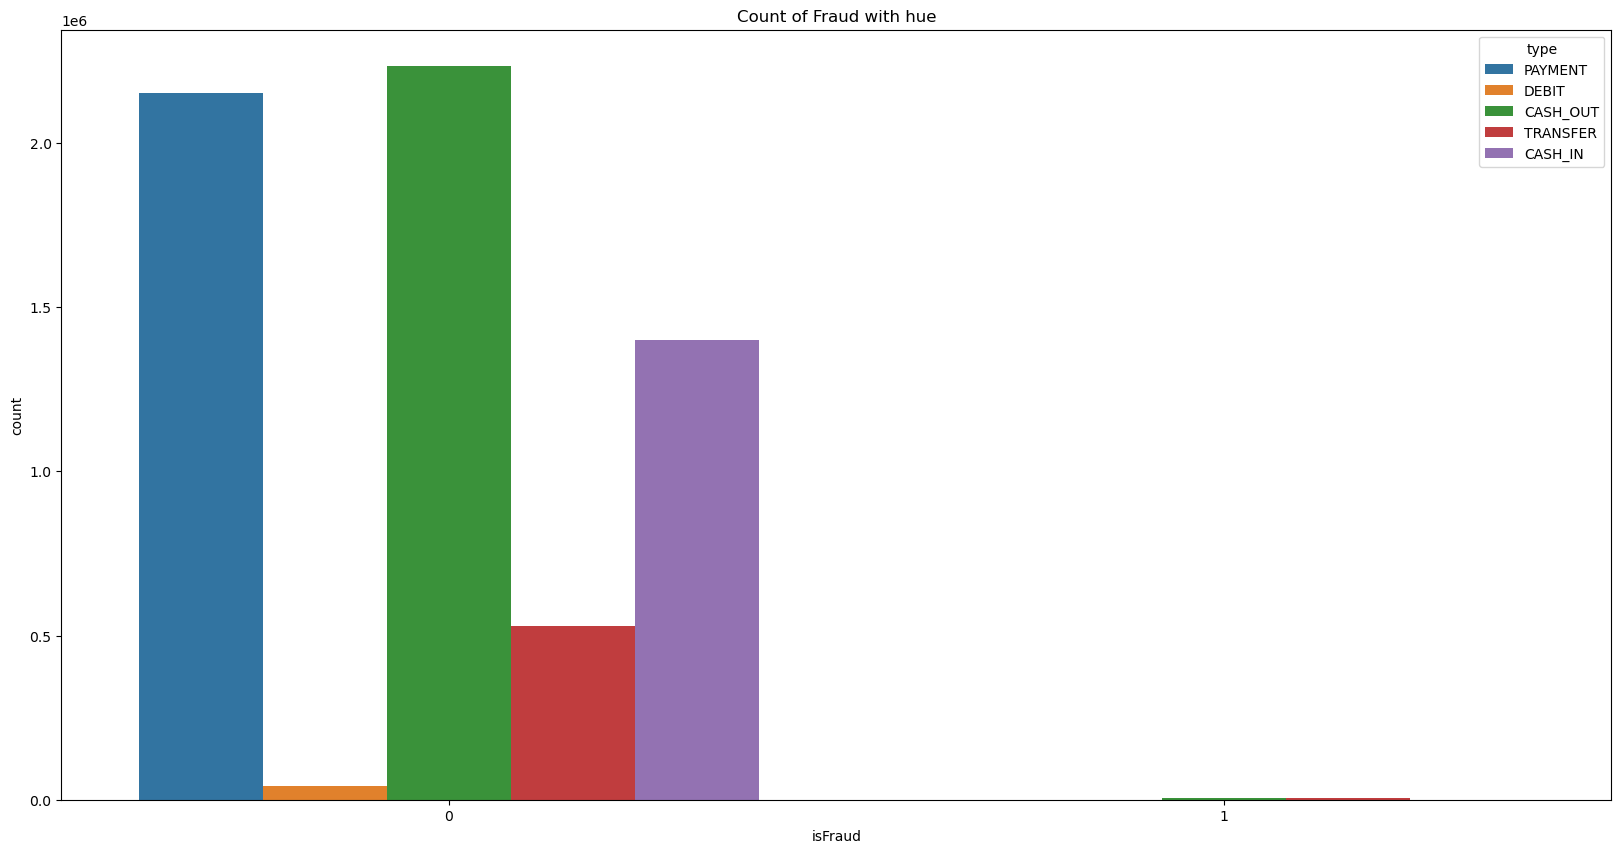

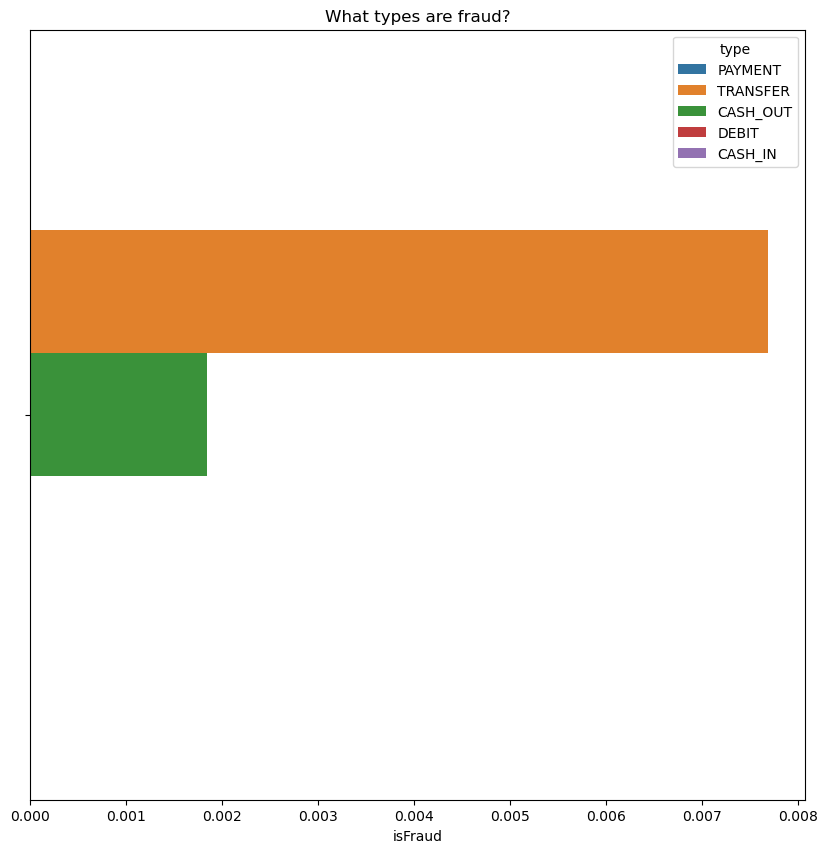

In [99]:
plt.figure(figsize=(20,10))
plt.title('Count of Fraud with hue')
sns.countplot(data= df, x= "isFraud" , hue = "type")
plt.show()

sns.barplot(data= df, x= "isFraud" , hue = "type", errorbar = None)
plt.title('What types are fraud?')
plt.show()


## ***Results***
### *Count of Fraud with hue*
   - We see a class imbalance here as more than 95% of samples belong to not fraud (0) compared to is Fraud
   - Payment and Cash out are the most common types under not fraud 
   - Debit is the least common type under not fraud 
   - Only types we see under fraud is Cash out and transfers

### *What types are fraud*
  - This looks deeper into the isFraud types from the first bar plot
  - Transfers are the most common type under fraud 

---

# **Flagged Fraud DataFrame**

In [18]:

IsFlaggedFraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


### *It looks like only Transfers are being marked fraud*

In [19]:

IsNotFlaggedFraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### *We can aslo see that some fradulent accounts were not flagged*

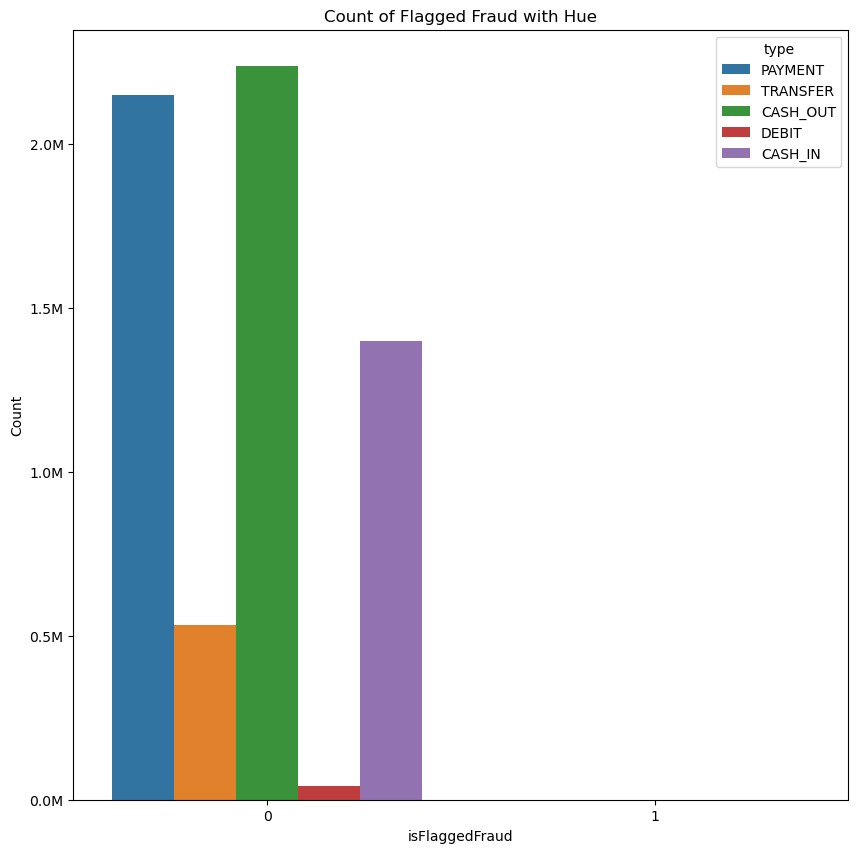

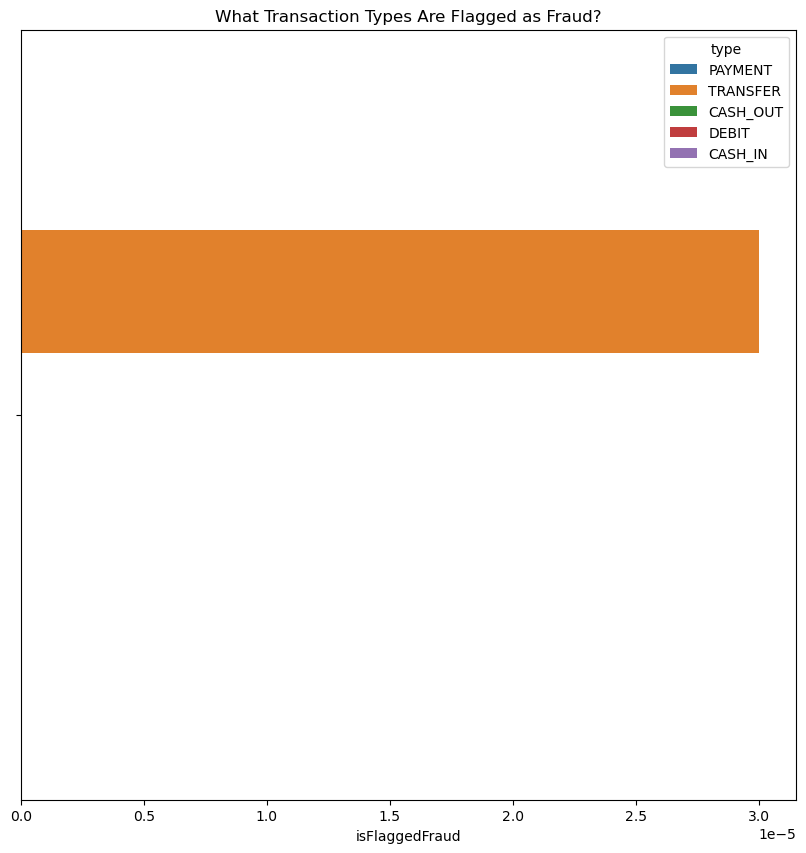

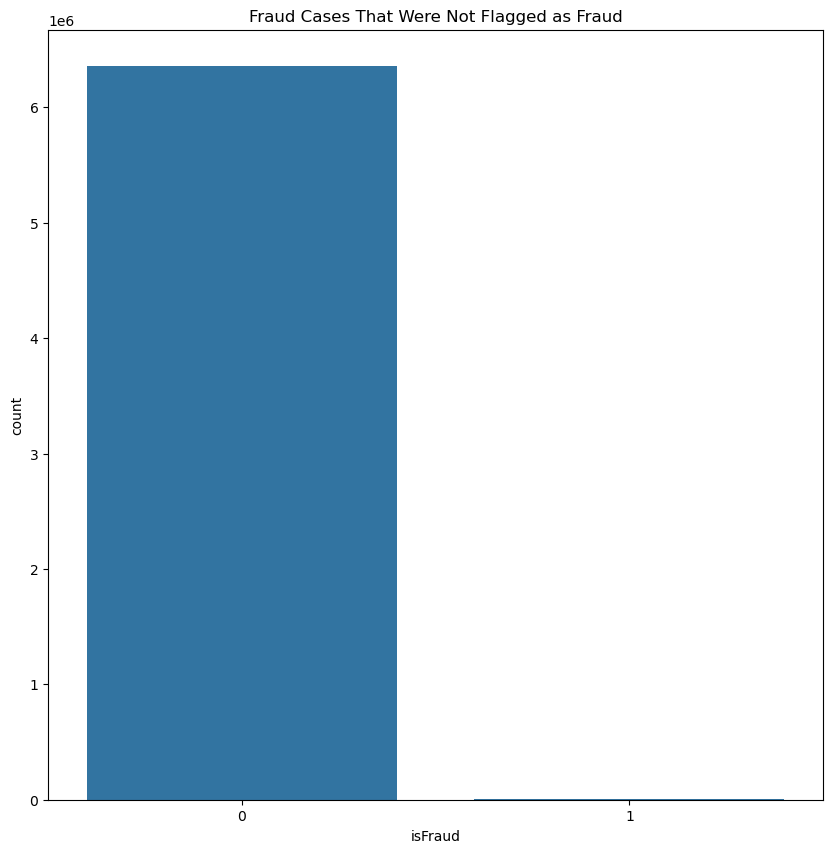

In [105]:
# Count plot of flagged fraud cases by transaction type
sns.countplot(data=df, x="isFlaggedFraud", hue="type")
plt.ylabel('Count')
plt.title('Count of Flagged Fraud with Hue')

# Formatting y-axis to display numbers in millions (1M)
formatter = FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M')  
plt.gca().yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()

# Bar plot to show which transaction types are flagged as fraud
sns.barplot(data=df, x="isFlaggedFraud", hue="type", errorbar=None)
plt.title('What Transaction Types Are Flagged as Fraud?')

plt.show()


# Count plot of actual fraud cases that were NOT flagged
sns.countplot(data=IsNotFlaggedFraud_df, x="isFraud")
plt.title('Fraud Cases That Were Not Flagged as Fraud')

plt.show()


## *Results*

### *Count of flagged fraud with hue*
- Shows flagged fraud cases by transaction type
- Most transactions were NOT flagged as fraud
- Payment , Cash_out and Cash in are the most common transaction types
- Only Transfers were flagged (you can see this in the bar plot but we do notice this very well in the IsFlaggedFraud_df dataframe)
### *What types are flagged as fraud?*
- Highlights transaction types that get flagged as fraud
- Flagged fraud cases are mostly Transfers
### *Fraud cases that weren't flagged as fraud*
- Focuses on fraud cases that were missed (not flagged)
- Useful for identifying gaps in fraud detection
- We see that there are a cases of fraud that weren't flagged
- This systems has gaps due to failing fradulent activity effectively




---

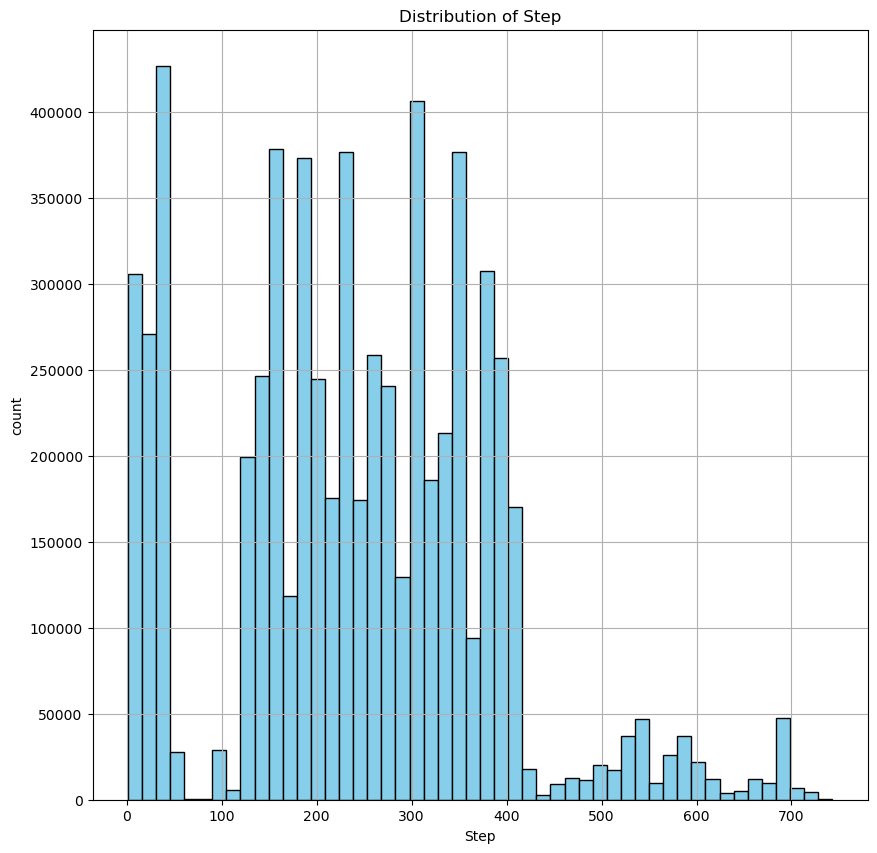

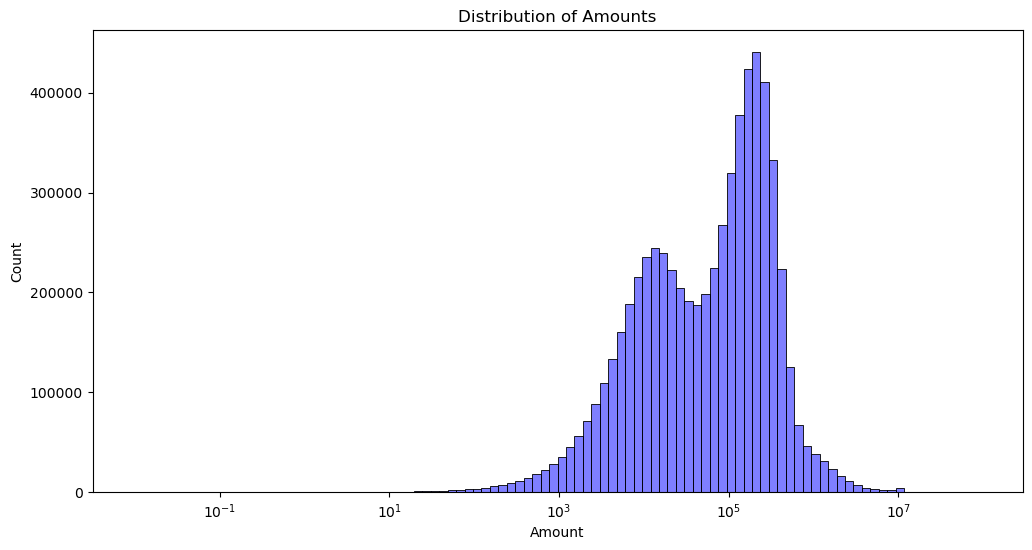

In [128]:

#sns.histplot(data= df, bins = 50, color= 'skyblue', edgecolor= 'black')
df['step'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Step")
plt.xlabel("Step")
plt.ylabel("count")

plt.figure(figsize=(12, 6))
sns.histplot(df['amount'], bins=100, kde=True, log_scale=True, color='blue')
plt.title('Distribution of Amounts')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

##plt.show()

## **Results**
 
 ### *Distribution of Step*
  - The counts where transactionas occurred at a time stamp, 
  - the most common time stamps were  around 1, 200, & 300, we can assume that since there were alot of movements here
  - potential movements where step increaseses could be were fraud occurred 
  - Decline in activity over time 

### *Distribution of Amounts*
  - The majority of transactions fall within a specific range, with a clear concentration around 10^5
  - We have two main peaks, (Bimodal distrubution), meaning transactions are happening aroind two diffrent value ranges.
  - As the amounts increase the transactions decrease , investigating those outliers could be where fraud is occurring  
  


---

# **Bivriate Analysis** 

/opt/anaconda3/envs/ds/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


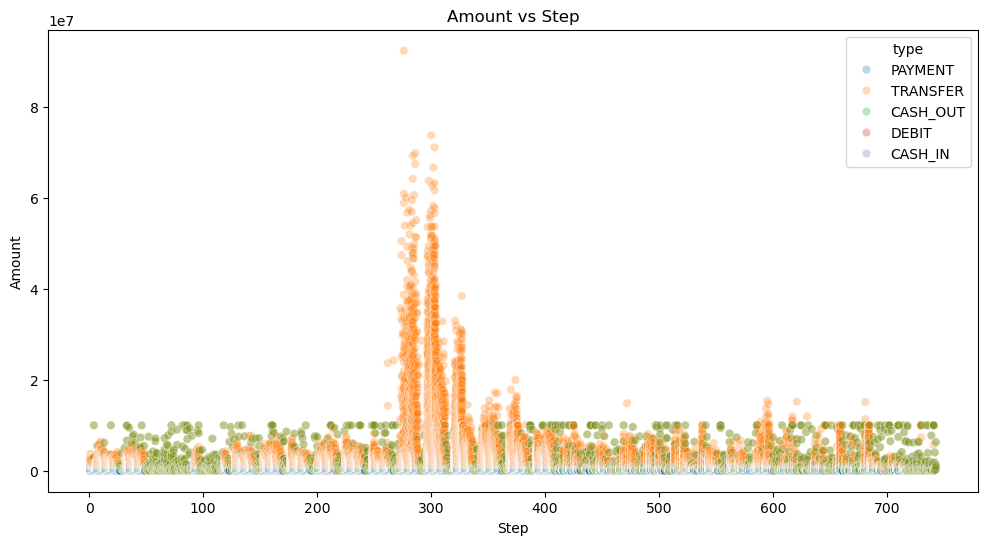

In [122]:
# Scatter Plot 1: Amount vs step ( colored by type)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x=df["step"], y=df["amount"], hue=df["type"], alpha = 0.3)
plt.xlabel("Step")
plt.ylabel("Amount")
plt.title("Amount vs Step")
plt.show()



## **Results**

### *Amount vs step*
- With in this scatter plot we see that a lot of occurrances happen around the 300 step.
- We see a lot of payment transactions here 
- we have seen a lot of payment and cash out types under fraud, could this be happening at this time interval? we can assume so 
  


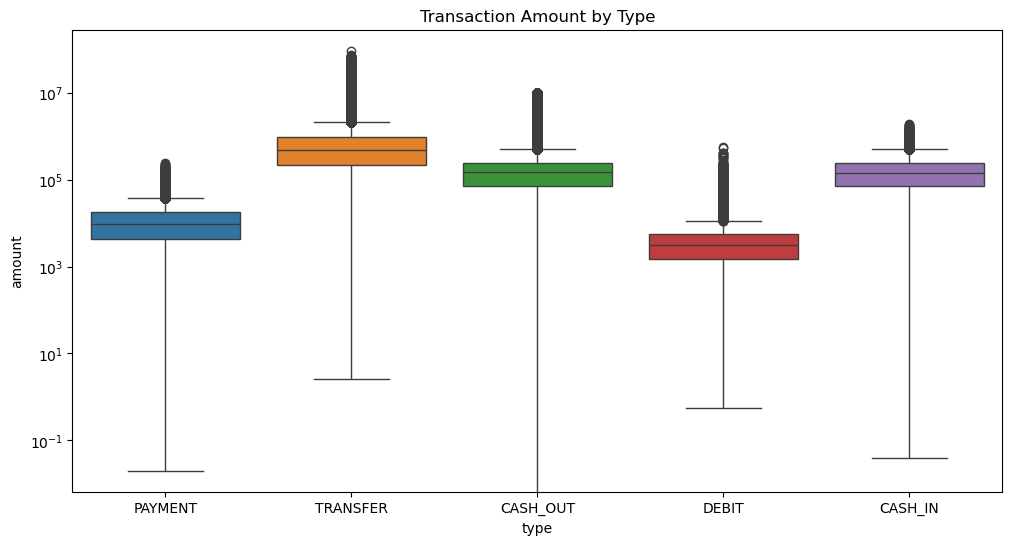

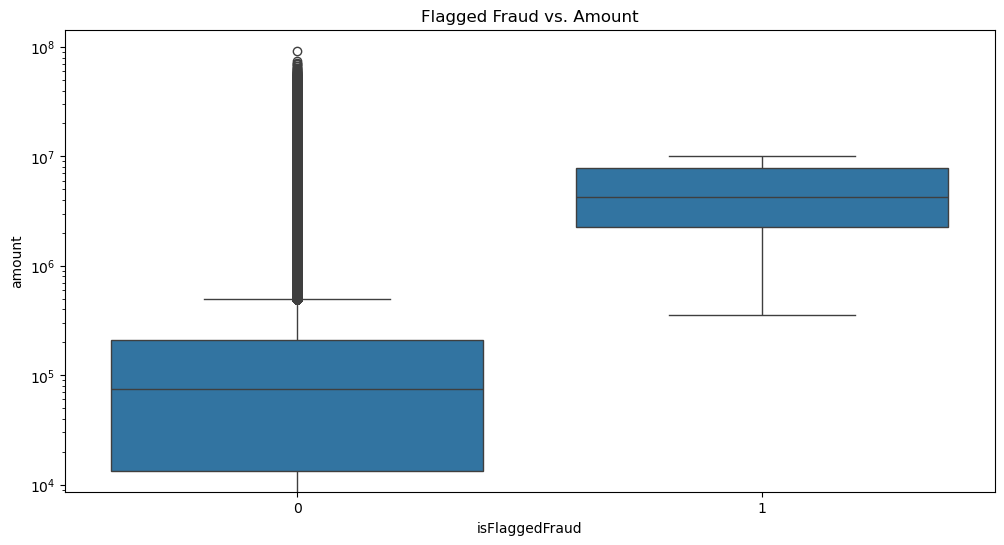

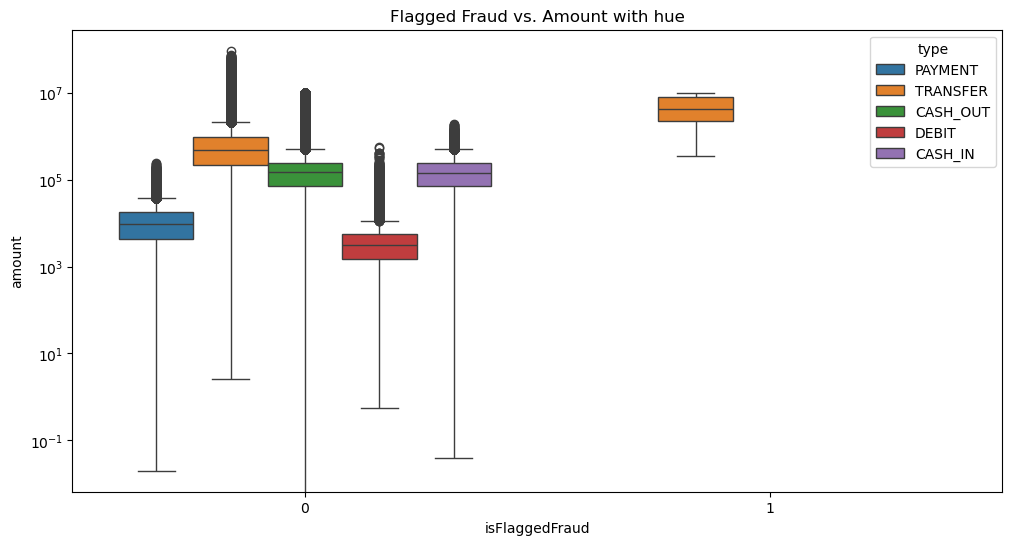

In [133]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='amount', data=df,hue='type', legend= False)
plt.yscale('log')  # Log scale to handle large values
plt.title('Transaction Amount by Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='isFlaggedFraud', y='amount', data=df)
plt.yscale('log')
plt.title('Flagged Fraud vs. Amount')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='isFlaggedFraud', y='amount', data=df, hue= 'type')
plt.yscale('log')
plt.title('Flagged Fraud vs. Amount with hue')
plt.show()

#### Transaction amount by type  
 - All the types have outliers as we can see but transfer's and Cash out have the highest outliers in terms of Amount
 - Transfer and cash out also have the highest median transaction amounts 

### Flagged Fraud vs Amount
- Transactions that are flagged as fraud (1) tend to have higher amounts, with a smaller range and fewer extreme outliers.
- Non-flagged transactions (0) show a wider range of values, with some transactions having very high outliers.
- The median transaction amount for flagged fraud cases is significantly higher than non-flagged ones.

### Flagged Fraud vs Amount with hue 
- This takes a closer look into the Flagged Fraud vs Amount box plot
- Transaction amounts vary significantly, with TRANSFER and CASH_OUT transactions 
showing higher median values and a large range.
-  Only Transfer transactions appear under the flagged fraud category.
  - The transaction amounts in this category are relatively high, suggesting that 
  flagged fraud transactions tend to involve large amounts.


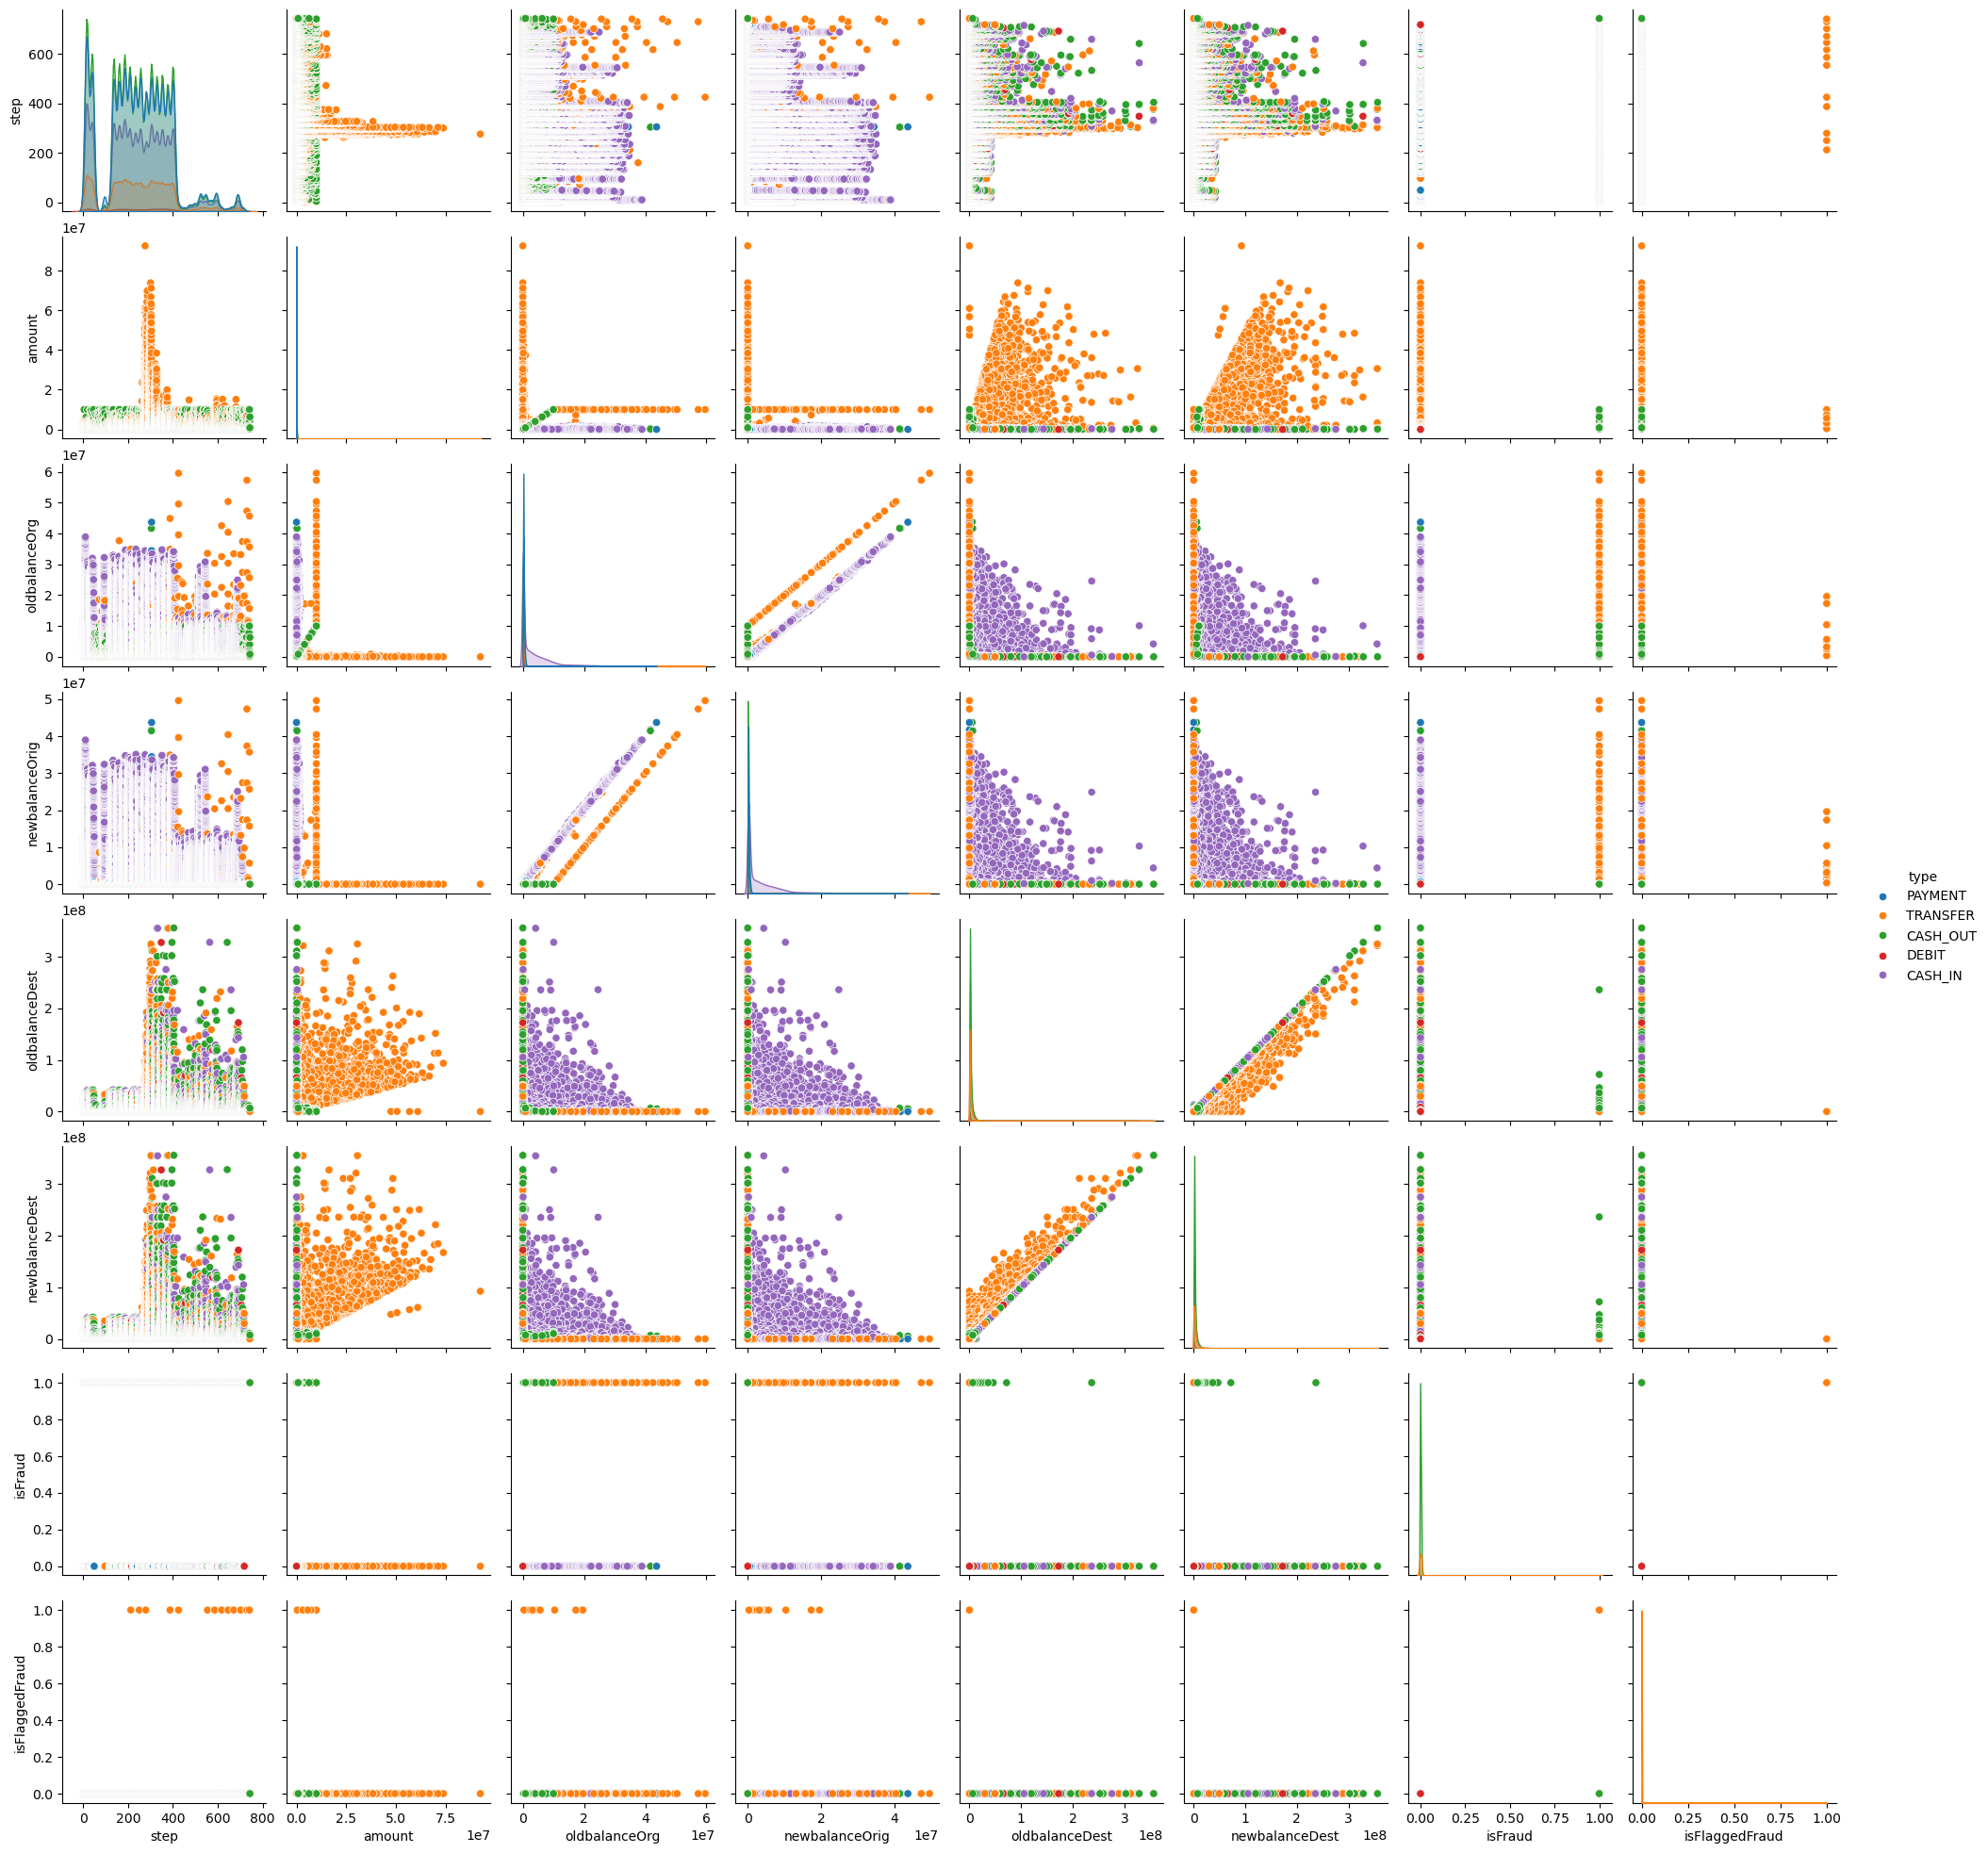

In [63]:
#Dropping 'nameDest' and 'nameOrig' coloumns for this pair plot since those contain strings 
data_plot = df.drop(columns=['nameDest', 'nameOrig'])
sns.pairplot(data_plot, hue = "type")

## Pair plot observations...

- This visualization helps understand feature relationships, outliers, and potential fraud patterns.
- Features like amount, oldbalanceOrg, and newbalanceOrig are be important for fraud detection.
- Fraud-related points (isFraud) appear clustered in specific areas, particularly within certain transaction types like Transfer and Cash out, suggesting these are more prone to fraud.
-  The isFlaggedFraud feature shows very few flagged transactions, implying that most fraud cases were not automatically detected by the system.




---

# **Multivariate Analysis** 

In [25]:
#dropping the tables that are object types and running a correlation on the remaining columns  
df_numeric = df.drop(columns=['type','nameDest', 'nameOrig'])
df_numeric.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: >

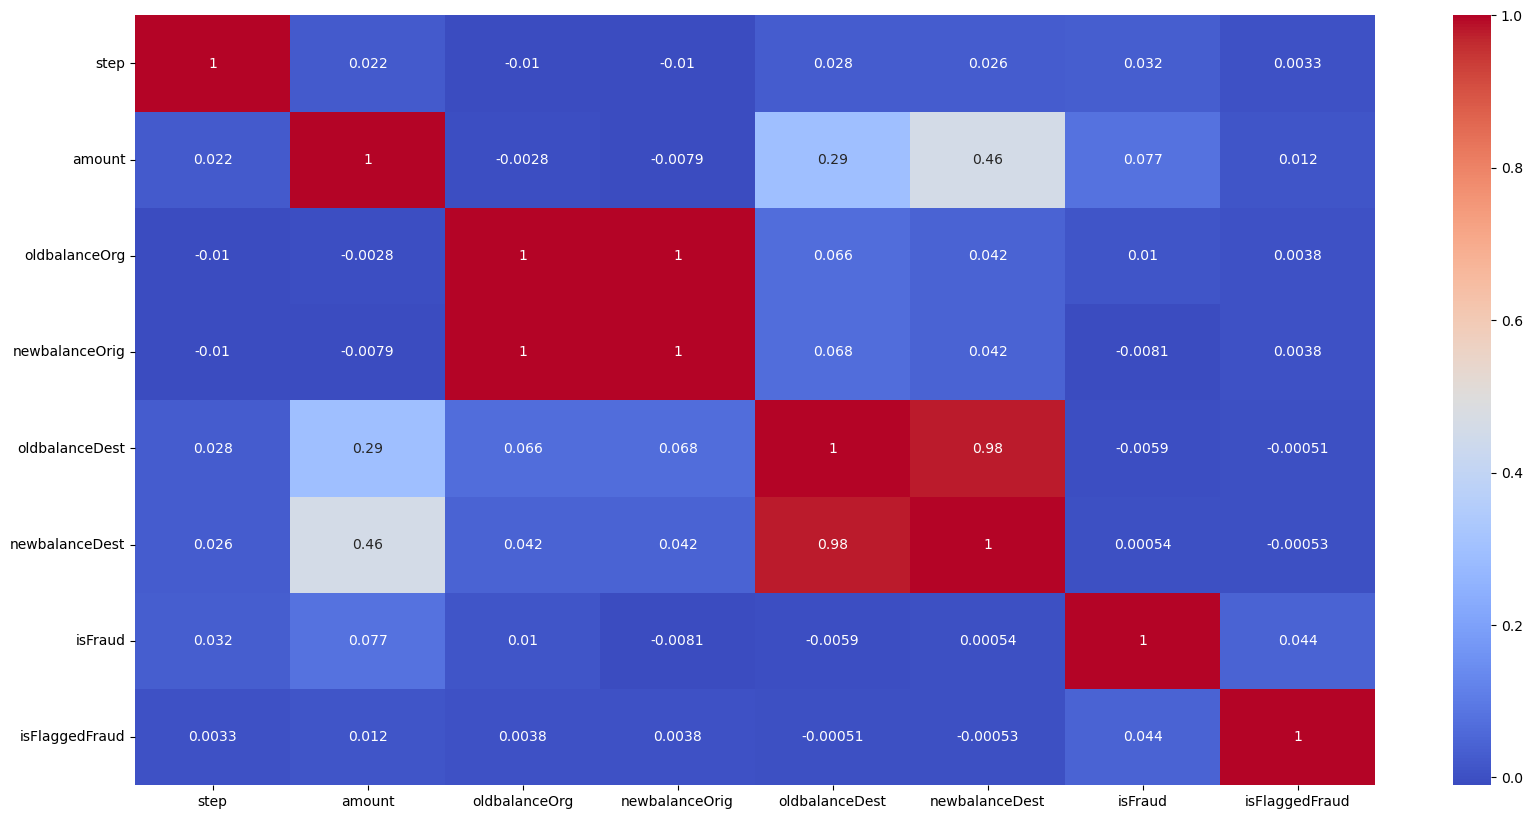

In [66]:
plt.figure(figsize=(20,10))
##sns.heatmap(df_numeric.corr(), annot= True , cmap= 'coolwarm')

## Heat Map results

- High Correlation: oldbalanceOrg and newbalanceOrig have a strong correlation as it approx. = 1 but not exactly 1... 
     - To follow up seeing the .98 correlation between oldbalanceDest and newBalanceDest show possible signs of fraud
- Moderate Correlation: Amount shows a moderate correlation with newbalanceDest (0.46) and oldbalanceDest (0.29), suggesting that transaction amounts impact destination balances.
- Weak Correlation with Fraud: isFraud has weak correlations with most features, meaning fraud detection may require more complex patterns beyond simple balance relationships.
- Minimal Correlation for Flagged Fraud: isFlaggedFraud has very low correlation values with other variables, implying that flagged fraud cases may be based on specific rules rather than natural data trends.
- Key Takeaway: Balances are highly connected, but fraud detection is not strongly dependent on individual numeric features, suggesting a need for advanced fraud detection methods.

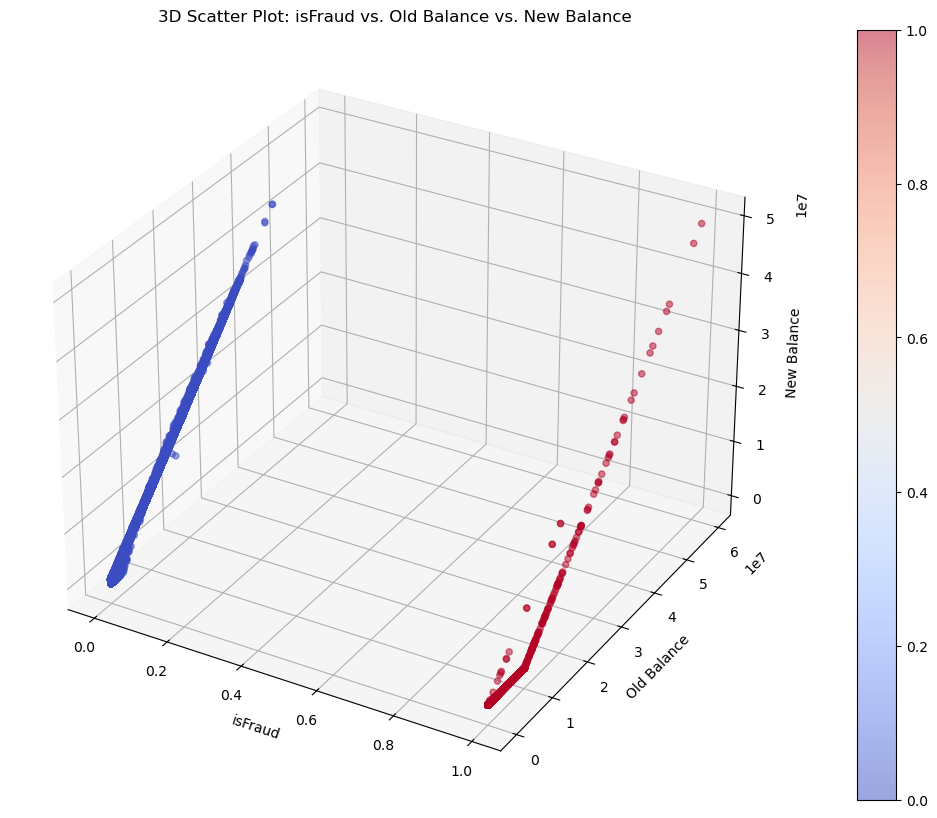

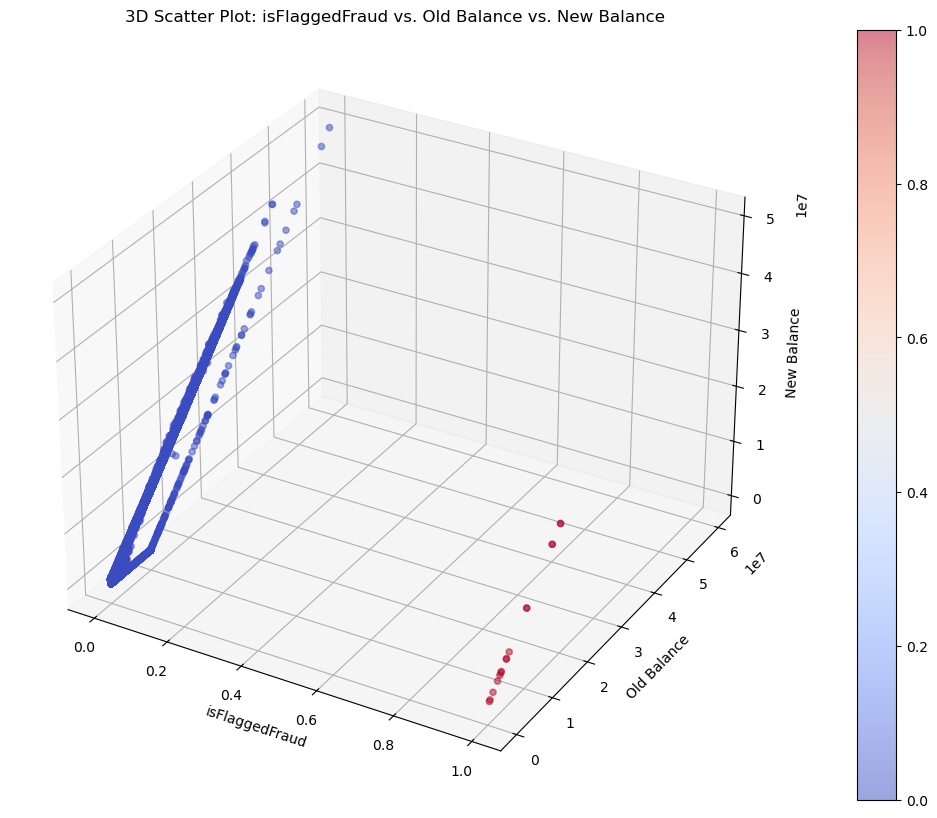

In [130]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure for plotting
fig = plt.figure(figsize=(20,10))

# Add a 3D subplot to the figure
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using 'amount', 'oldbalanceOrg', and 'newbalanceOrig' columns

sc = ax.scatter(df['isFraud'], df['oldbalanceOrg'], df['newbalanceOrig'], c=df['isFraud'], cmap= 'coolwarm', marker='o', alpha=0.5)

# Set labels for the axes
ax.set_xlabel('isFraud')
ax.set_ylabel('Old Balance')
ax.set_zlabel('New Balance')

# Set the title for the plot
ax.set_title('3D Scatter Plot: isFraud vs. Old Balance vs. New Balance')

plt.colorbar(sc)

# Show the plot
plt.show()



# Doing the same thing but for isFlaggedfRAUD vs old balance vs New balance
fig = plt.figure(figsize=(20,10))


ax = fig.add_subplot(111, projection='3d')



sc = ax.scatter(df['isFlaggedFraud'], df['oldbalanceOrg'], df['newbalanceOrig'], c=df['isFlaggedFraud'], cmap= 'coolwarm', marker='o', alpha=0.5)


ax.set_xlabel('isFlaggedFraud')
ax.set_ylabel('Old Balance')
ax.set_zlabel('New Balance')


ax.set_title('3D Scatter Plot: isFlaggedFraud vs. Old Balance vs. New Balance')

plt.colorbar(sc)

# Show the plot
plt.show()

### 3D Scatter Plot: isFraud vs. Old Balance vs. New Balance

- The balances that aren't fraud seem more cluster together , compared to the balances that are fraud 
- balances old and new under fraud have a higher amounts 
- The plot visually demonstrates that fraudulent transactions might be detected based on balance patterns 

### 3D Scatter Plot: isFlaggedFraud vs. Old Balance vs. New Balance
-  The majority of transactions are not flagged as fraud (blue points), while only a small portion of transactions are flagged as fraud (red points). This indicates that fraud-flagging is relatively rare.
- The few red points suggest that only a small subset of transactions gets flagged, meaning the fraud detection system has strict criteria for flagging fraud.(only anything over 200,00 is flagged)